# Module 2.0: Feature Extraction and Object Detection

# SIFT Feature Extraction

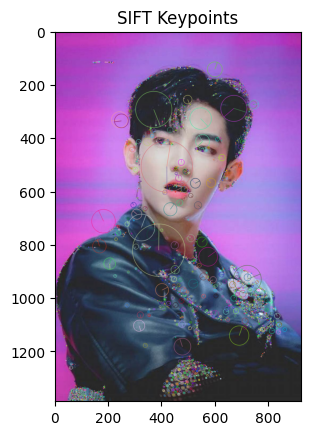

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/zhang hao 1.jfif')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

# SURF Feature Extraction

In [ ]:
!pip uninstall opencv-python opencv-contrib-python -y

!git clone --depth 1 https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
      -D CMAKE_INSTALL_PREFIX=/usr/local \
      -D OPENCV_ENABLE_NONFREE=ON \
      -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
      -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
Cloning into 'opencv'...
remote: Enumerating objects: 9007, done.
remote: Counting objects: 100% (9007/9007), done.
remote: Compressing objects: 100% (7680/7680), done.
remote: Total 9007 (delta 1425), reused 4674 (delta 890), pack-reused 0 (from 0)
Receiving objects: 100% (9007/9007), 89.18 MiB | 25.52 MiB/s, done.
Resolving deltas: 100% (1425/1425), done.
Updating files: 100% (7567/7567), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41556, done.
remote: Counting objects: 100% (1315/1315), done.
remote: Compressing objects: 100% (947/947), done.
remote: Total 41556 (delta 496), reused 915 (delta 293), pack-reused 40241 (from 1)
Receiving objects: 100% (41556/4

In [ ]:
import os
os.kill(os.getpid(), 9)

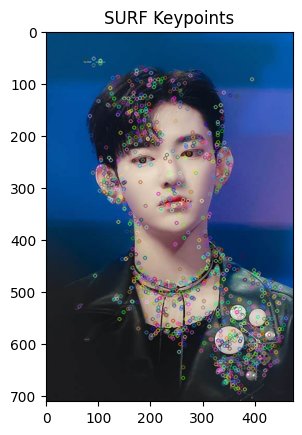

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/zhang hao.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create()

keypoints, descriptors = surf.detectAndCompute(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

# ORB Feature Extraction

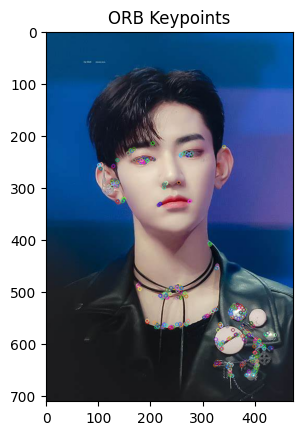

In [ ]:
# Load the image
image = cv2.imread('/content/zhang hao.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints")
plt.show()

# Feature Matching using SIFT

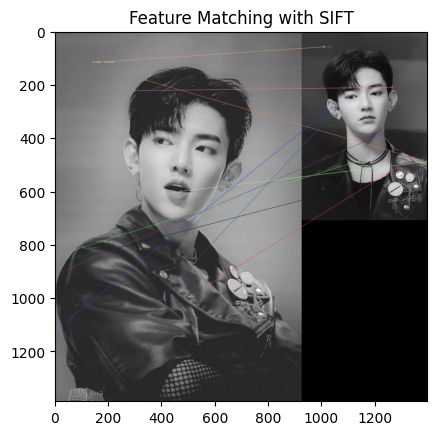

In [ ]:
# Load two images
image1 = cv2.imread('/content/zhang hao 1.jfif', 0)
image2 = cv2.imread('/content/zhang hao.jfif', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Soft matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches, cmap='gray')
plt.title('Feature Matching with SIFT')
plt.show()

# Image Stitching using Homography

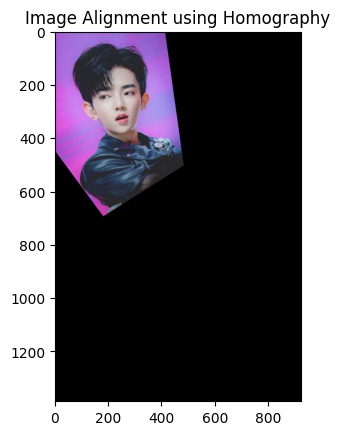

In [ ]:
# Load two images
image1 = cv2.imread('/content/zhang hao 1.jfif')
image2 = cv2.imread('/content/zhang hao.jfif')

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
# Remove the k argument to fix the error
matches = bf.match(descriptors1, descriptors2)

# Apply ratio test (Lowe's ratio test) - This part needs modification since you intended to use k=2
# We will use knnMatch instead for ratio test
matches = bf.knnMatch(descriptors1, descriptors2, k=2)  # Find two nearest neighbors

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# warp one image to align with the other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.show()

# Combining SIFT and ORB

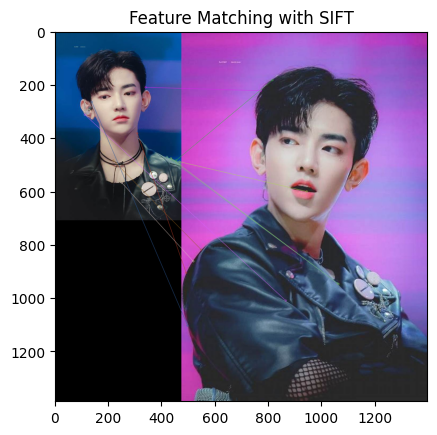

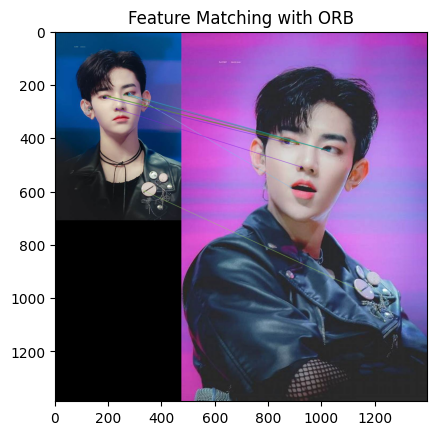

In [ ]:
# Use SIFT and ORB to extract features from two images

# Load the image
image1 = cv2.imread('/content/zhang hao.jfif')
image2 = cv2.imread('/content/zhang hao 1.jfif')

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Initialize the Brute-Force matcher for SIFT
bf_sift = cv2.BFMatcher(cv2.NORM_L2)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Initialize the Brute-Force matcher for ORB
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Detect keypoints and compute descriptors
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Detect keypoints and compute descriptors
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Match the descriptors for SIFT
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)

# Match the descriptors for ORB
matches_orb = bf.match(descriptors1_orb, descriptors2_orb)

# Sort the matches by distance (best matches first)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Sort the matches by distance (best matches first)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw matches for SIFT
image_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2,
                                     keypoints2_sift, matches_sift[:10],
                                     None, flags=2)

# Draw matches for ORB
image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2,
                                    keypoints2_orb, matches_orb[:10],
                                    None, flags=2)

# Display the image with SIFT keypoint matches
plt.imshow(cv2.cvtColor(image_matches_sift, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching with SIFT")
plt.show()

# Display the image with ORB keypoint matches
plt.imshow(cv2.cvtColor(image_matches_orb, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching with ORB")
plt.show()